You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)


Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns

# Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [96]:
df = pd.read_csv('diabetes.csv')

In [97]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [99]:
df.shape

(768, 9)

In [100]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [101]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [102]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot: >

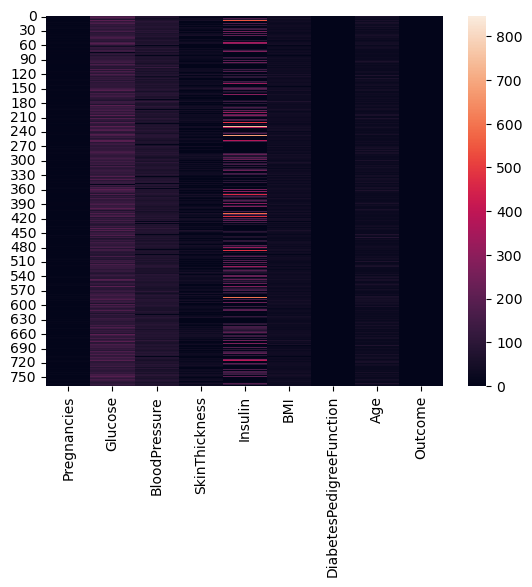

In [103]:
sns.heatmap(df)

In [104]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot: >

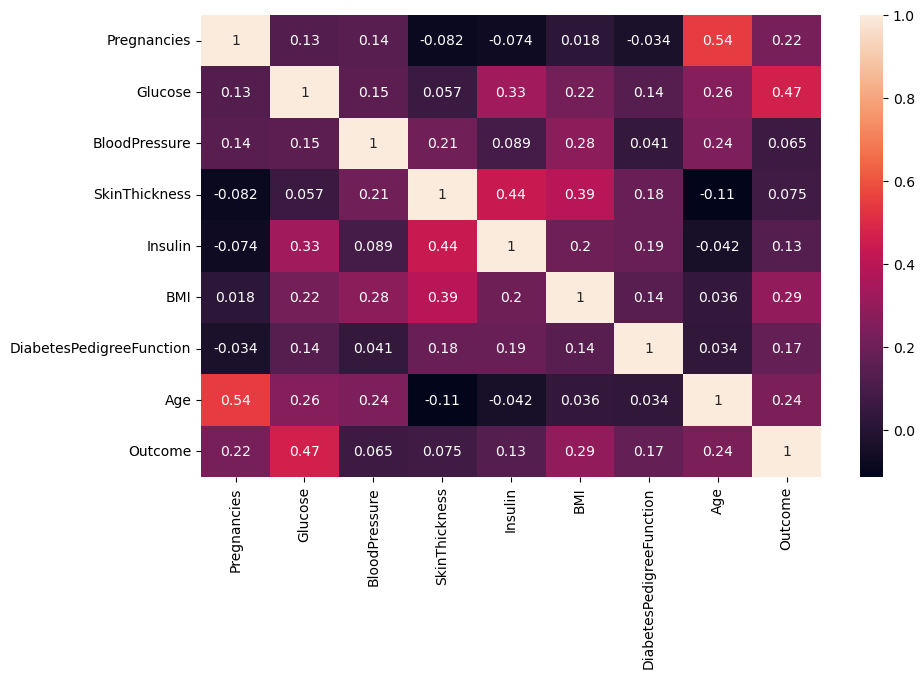

In [105]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot: >

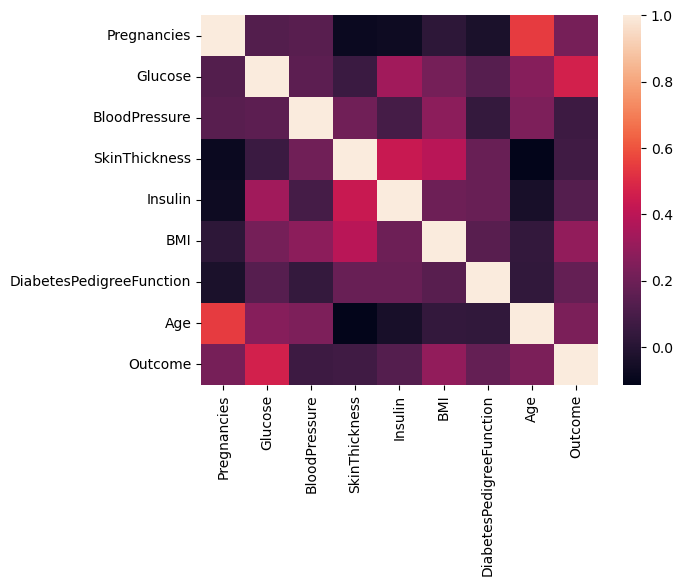

In [106]:
sns.heatmap(df.corr())

<AxesSubplot: >

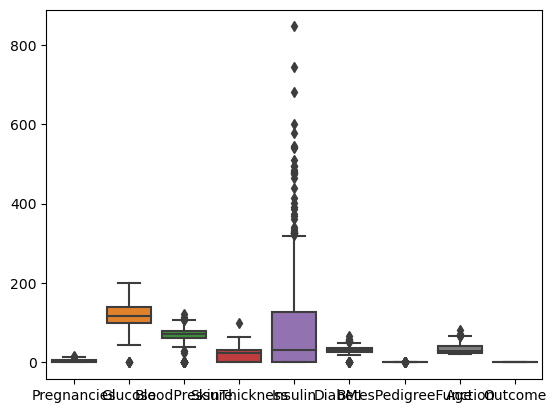

In [107]:
sns.boxplot(df)

<AxesSubplot: ylabel='Count'>

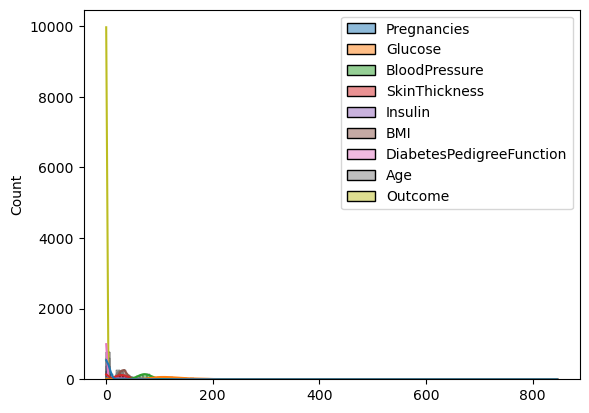

In [108]:
sns.histplot(df,kde=True)

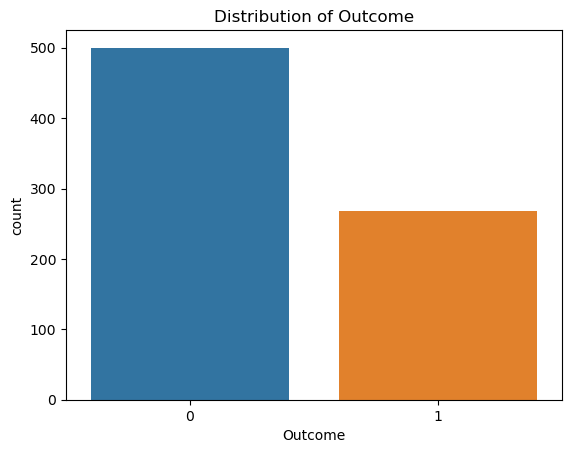

In [123]:
# plot countplot:

sns.countplot(x='Outcome',data=df)
plt.title("Distribution of Outcome")
plt.show()

# Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [109]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# There is no missing values in the given dataset and no categorical variable.

In [110]:
df.duplicated().sum()

0

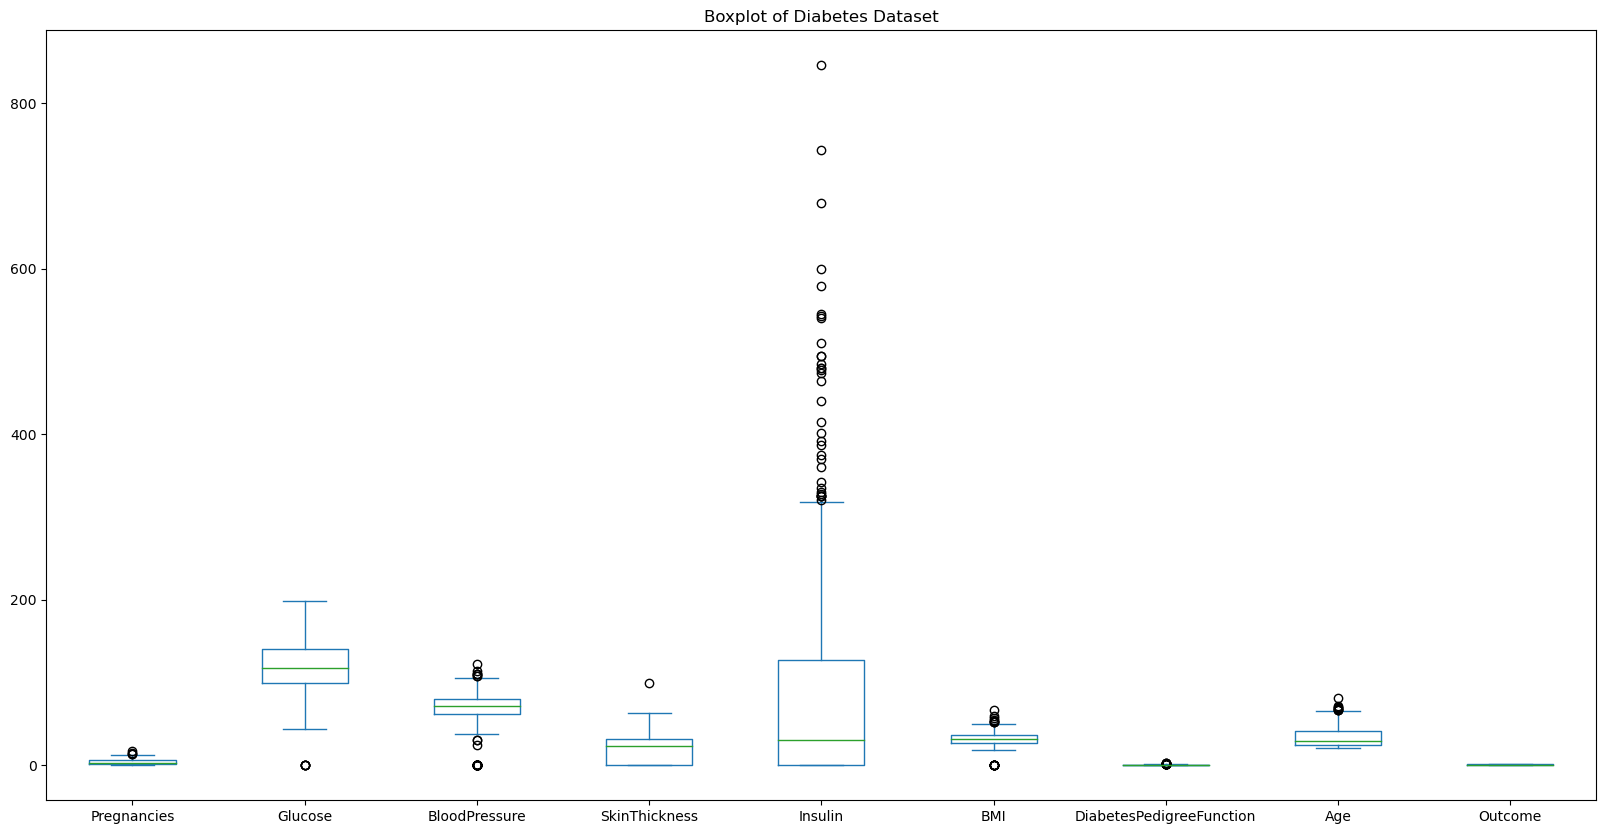

In [124]:
## Removing outliers
# visualize outliers
df.plot(kind="box", figsize=(20,10))
plt.title("Boxplot of Diabetes Dataset")
plt.show()



In [125]:
# some modification
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [126]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


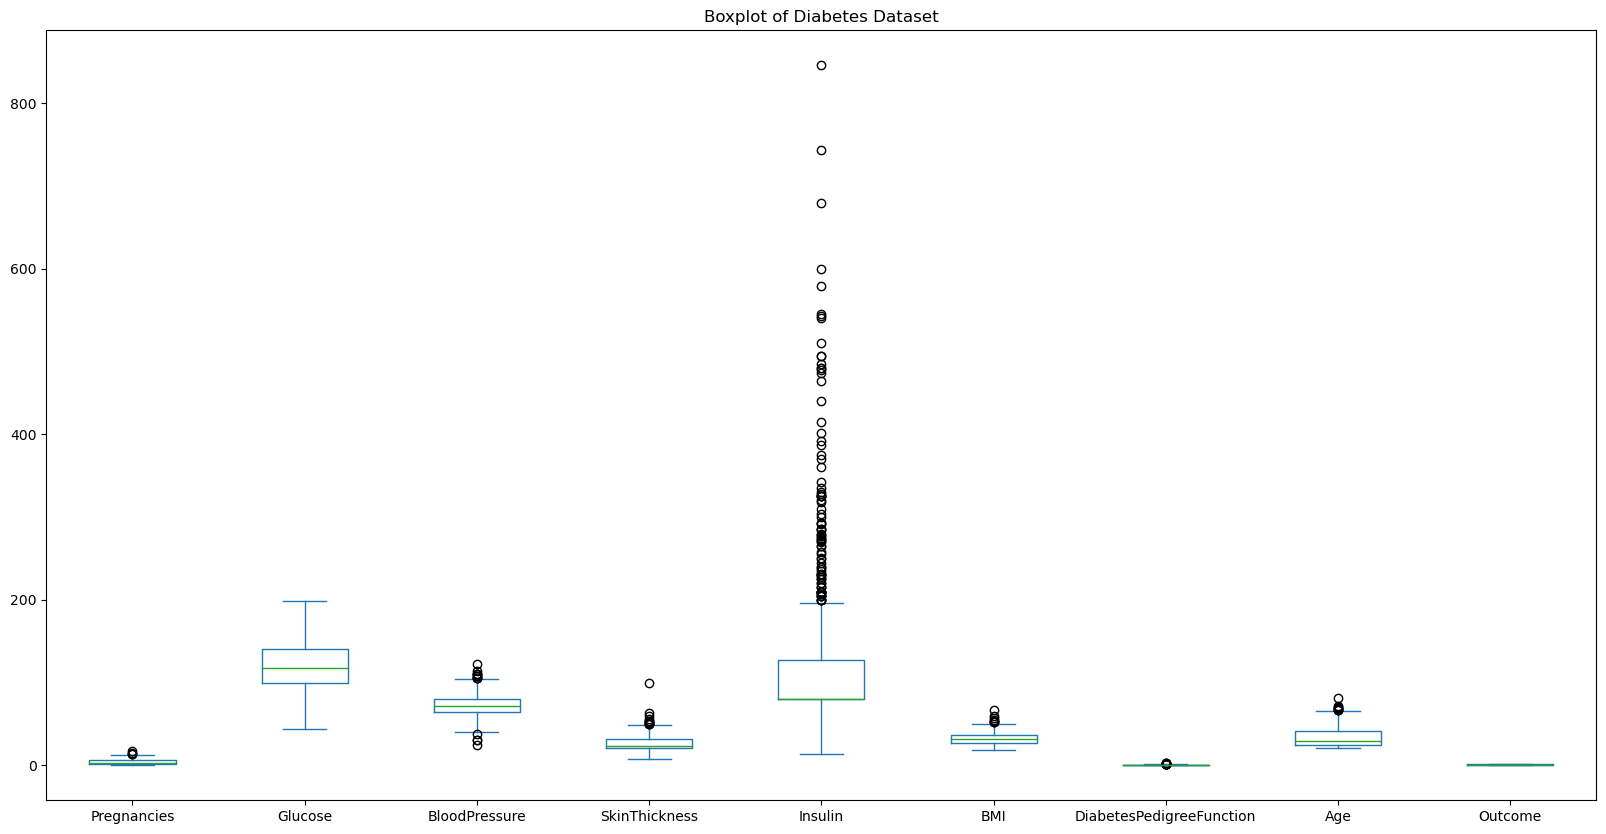

In [127]:
df.plot(kind="box", figsize=(20,10))
plt.title("Boxplot of Diabetes Dataset")
plt.show()

# Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [128]:
# independent feature
X=df.iloc[:,:-1]

# dependent feature
y = df.iloc[:,-1]

In [131]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

# Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [138]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [139]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [140]:
y_pred = dt.predict(X_test)

In [141]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [143]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    "max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],}

# Create a grid search cross-validation object
grid_search = GridSearchCV(dt, param_grid, cv=10)

# Fit the grid search cross-validation object to the training data
grid_search.fit(X_train, y_train)

# best parameters
grid_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 4}

In [144]:
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 4}
Best score: 0.7653358011634056


In [146]:
from sklearn.metrics import classification_report
#predict the target variable for the test data
y_pred = grid_search.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76        99
           1       0.58      0.73      0.65        55

    accuracy                           0.71       154
   macro avg       0.70      0.72      0.70       154
weighted avg       0.74      0.71      0.72       154



# Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [151]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,confusion_matrix,roc_curve

acc=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)




print("Accuracy",acc)
print("Precision",precision)
print("Recall",recall)
print("f1",f1)

Accuracy 0.7142857142857143
Precision 0.5797101449275363
Recall 0.7272727272727273
f1 0.6451612903225806


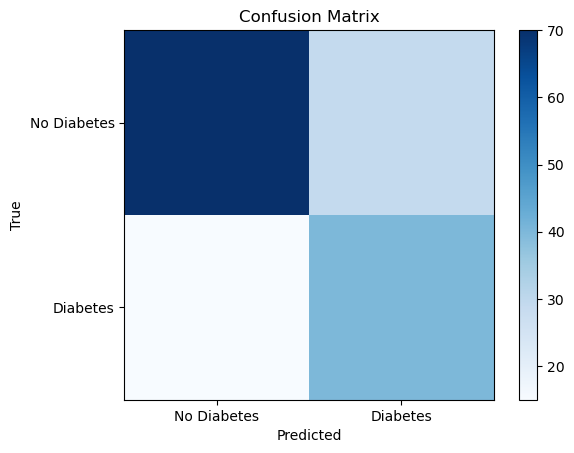

In [152]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap="Blues", interpolation="nearest")
plt.colorbar()
plt.xticks([0, 1], ["No Diabetes", "Diabetes"])
plt.yticks([0, 1], ["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()





#The plt.imshow function is used to display the confusion matrix as an image.
#The cmap="Blues" parameter sets the color map to shades of blue to represent the confusion matrix values.
#The interpolation="nearest" parameter specifies how the pixels are interpolated when displaying the image.

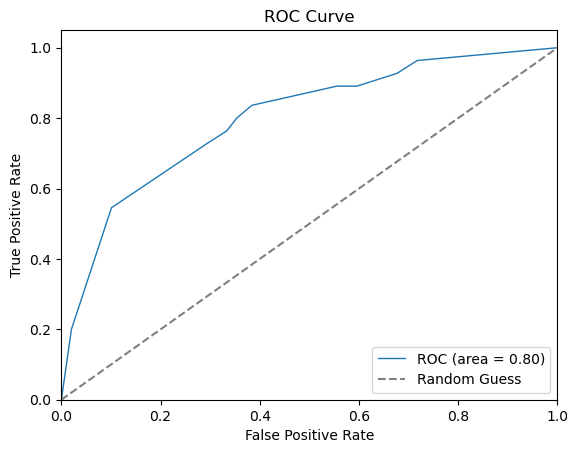

In [153]:
# Plot the ROC curve
from sklearn.metrics import auc

y_prob = grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, label="ROC (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], "--", color="gray", label="Random Guess")
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

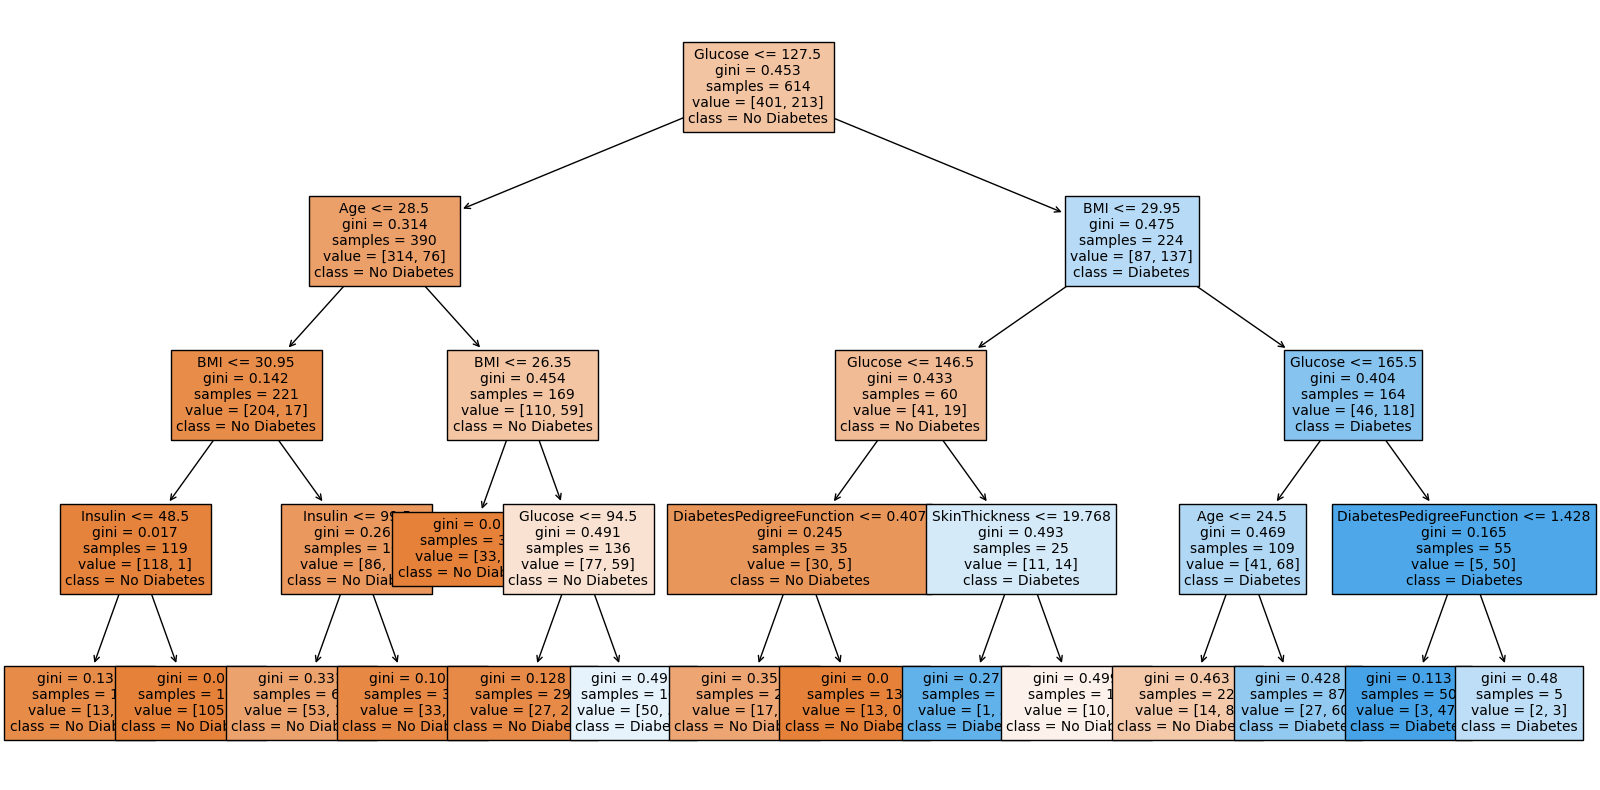

In [156]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(grid_search.best_estimator_, feature_names=X_train.columns, class_names=["No Diabetes", "Diabetes"], filled=True, fontsize=10)
plt.show()

In [ ]:
from sklearn.tree import export_text

tree_rules = export_text(grid_search.best_estimator_, feature_names=X_train.columns.tolist())
print(tree_rules)

The first split in the decision tree is based on the Glucose variable, with a threshold of 127.5. This means that if a patient's glucose level is above 127.5, they are likely to have diabetes, and the algorithm will move down the left branch of the decision tree. If their glucose level is below or equal to 127.5, the algorithm will move down the right branch, which indicates a lower probability of diabetes.

The second level of the decision tree is based on the BMI variable, with a threshold of 26.35. If a patient's BMI is above this threshold, they are more likely to have diabetes, and the algorithm will move down the left branch. If their BMI is below or equal to the threshold, the algorithm will move down the right branch.

The third level of the decision tree is based on the Age variable, with a threshold of 28.5. If a patient's age is below or equal to this threshold, they are more likely to have diabetes, and the algorithm will move down the left branch. If their age is above the threshold, the algorithm will move down the right branch.

The fourth level of the decision tree is based on the Insulin variable, with a threshold of 140.5. If a patient's insulin level is above this threshold, they are more likely to have diabetes, and the algorithm will move down the left branch. If their insulin level is below or equal to the threshold, the algorithm will move down the right branch.

The fifth level of the decision tree is based on the BMI variable again, with a threshold of 29.15. If a patient's BMI is above this threshold, they are more likely to have diabetes, and the algorithm will move down the left branch. If their BMI is below or equal to the threshold, the algorithm will move down the right branch.

The sixth level of the decision tree is based on the BloodPressure variable, with a threshold of 62.5. If a patient's blood pressure is below or equal to this threshold, they are more likely to have diabetes, and the algorithm will move down the left branch. If their blood pressure is above the threshold, the algorithm will move down the right branch.

The seventh level of the decision tree is based on the Age variable again, with a threshold of 36.5. If a patient's age is below or equal to this threshold, they are more likely to have diabetes, and the algorithm will move down the left branch. If their age is above the threshold, the algorithm will move down the right branch.

The eighth level of the decision tree is based on the BMI variable again, with a threshold of 42.05. If a patient's BMI is above this threshold, they are more likely to have diabetes, and the algorithm will move down the left branch. If their BMI is below or equal to the threshold, the algorithm will move down the right branch.



# Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

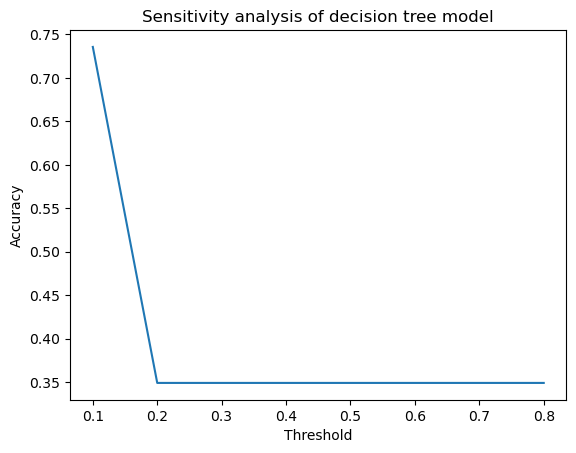

In [159]:
 #Vary the threshold values of the decision tree
threshold_values = np.arange(0.1, 0.9, 0.1)
accuracy_scores = []

for threshold in threshold_values:
    dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=20, min_samples_leaf=10, class_weight='balanced', random_state=42, ccp_alpha=threshold)
    dt_model.fit(df.drop('Outcome', axis=1), df['Outcome'])
    y_pred = dt_model.predict(df.drop('Outcome', axis=1))
    accuracy = accuracy_score(df['Outcome'], y_pred)
    accuracy_scores.append(accuracy)
    
plt.plot(threshold_values, accuracy_scores)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Sensitivity analysis of decision tree model')
plt.show()

Sensitivity analysis involves examining how changes in the input variables affect the output of the model. For example, we can vary the threshold values for the splits in the decision tree to see how they affect the model's performance. We can also vary the hyperparameters used in the decision tree algorithm, such as the maximum depth of the tree or the minimum number of samples required to split a node, to see how they affect the model's accuracy.

Scenario testing involves applying the decision tree model to new data or testing its robustness to changes in the dataset or the environment. For example, we can collect new data from different sources or under different conditions and test how well the model performs on this data. We can also introduce different types of errors or biases into the data to see how well the model can handle these challenges.

By performing sensitivity analysis and scenario testing, we can gain a better understanding of the strengths and limitations of the decision tree model, and identify areas for improvement or further research.